In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=5,
                  random_state=10)

In [3]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


### 라벨링되지 않은 데이터 플롯

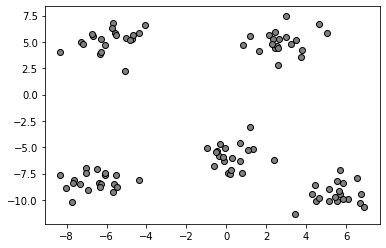

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],
            c='gray',
            edgecolors='black',
            marker='o')
plt.show()

In [10]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5,
            init='random',
            max_iter=100,
            random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_

In [11]:
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head()

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0


In [12]:
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


### K-Means를 이용한 데이터플롯

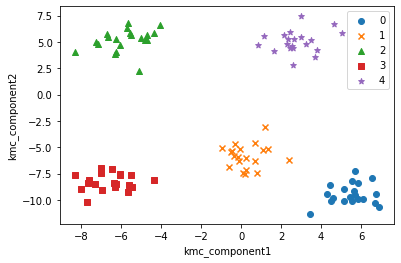

In [15]:
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc'] == i]
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    target_i = i
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

### 실제 타깃 플롯

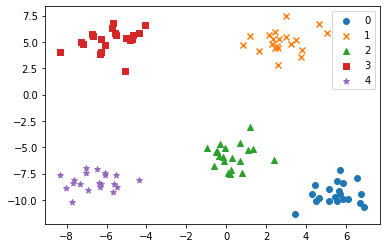

In [17]:
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*']

for i, mark in enumerate(markers):
    df_i = df[df['target'] == i]
    target_i = i 
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2,
                marker=mark,
                label=target_i)
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782
